In [3]:
import pandas as pd
import numpy as np

In [16]:
cornell_df = pd.read_csv("../cornell_movie/predictions.csv")
cornell_df = cornell_df.iloc[::-1]
cornell_df = cornell_df.drop(["Unnamed: 0", "speaker"], axis=1)
cornell_df = cornell_df.rename(columns={"utterance text": "text", "conversation_id": "conversation"})
cornell_df.insert(2, "source", "Cornell")

In [17]:
cornell_df

,text,conversation,source,0,1,2,3,4,5,6,...,18,19,20,21,22,23,24,25,26,27
304445,Colonel Durnford... William Vereker. I hear yo...,L666256,Cornell,-6.737959,-8.184252,-7.759193,-6.076953,-5.967172,-7.773337,-3.765209,...,-8.436464,-8.448975,-7.405308,-8.812127,-7.122664,-8.446054,-8.748944,-8.372815,-5.710989,2.100430
304444,"Good ones, yes, Mr Vereker. Gentlemen who can ...",L666256,Cornell,1.951447,-7.301604,-7.476500,-5.885305,0.921823,-7.055074,-7.786498,...,-7.499782,-8.586514,-4.751183,-7.029193,-6.261419,-7.789165,-8.677416,-8.251197,-7.939310,-1.863808
304443,"Your orders, Mr Vereker?",L666369,Cornell,-7.306279,-8.270448,-7.640837,-5.964887,-5.235689,-7.692601,-3.194700,...,-8.688370,-8.516042,-7.183609,-8.845353,-7.255379,-8.508457,-8.726622,-8.571457,-7.730612,2.247898
304442,I'm to take the Sikali with the main column to...,L666369,Cornell,-6.931197,-7.909531,-7.397606,-5.993287,-3.104389,-7.351592,-6.196944,...,-8.225678,-8.225738,-4.861578,-8.452392,-5.833093,-8.025157,-8.560670,-8.000977,-8.021872,3.831411
304441,Lord Chelmsford seems to want me to stay back ...,L666369,Cornell,-7.064470,-7.562948,-7.227080,-4.127013,-3.992013,-6.218512,-5.487997,...,-7.888612,-7.432271,-5.092277,-8.177619,-5.420301,-7.528449,-8.203114,-6.603066,-7.553047,3.449779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Let's go.,L924,Cornell,-7.494947,-7.953329,-6.848414,-6.154107,-3.857252,-7.458092,-6.752992,...,-8.142455,-8.096924,-5.522057,-8.695136,-5.862500,-7.895298,-8.451159,-7.658334,-7.350202,4.229424
3,She okay?,L984,Cornell,-7.394925,-8.422208,-8.233183,-7.262945,-5.963159,-1.045211,-1.829974,...,-7.909905,-7.816961,-7.182050,-8.869298,-7.130611,-7.719046,-8.653565,-7.548312,-6.040685,0.612777
2,I hope so.,L984,Cornell,-7.071383,-8.080991,-8.237708,-7.438438,-4.005056,-6.264260,-7.329815,...,-7.819698,-8.379241,3.509809,-8.805497,-7.396857,-8.128626,-8.643777,-8.001550,-8.556865,-5.470668
1,They do to!,L1044,Cornell,-5.930440,-6.577653,-5.159780,-3.634088,-2.398159,-6.632767,-5.981420,...,-6.780757,-7.983085,-5.798102,-8.299724,-5.115921,-7.488402,-8.293399,-7.577650,-6.165895,4.011903


In [4]:
#iemocap
iemocap_df = pd.read_csv("../iemocap/predictions.csv")
iemocap_df = iemocap_df.drop("Unnamed: 0", axis=1)
iemocap_df.insert(2, "source", "IEMOCAP")

In [5]:
#ubuntu

In [6]:
#bolt

In [29]:
df = pd.concat([cornell_df, iemocap_df])

In [30]:
df.to_csv("../model/data.csv", index=False)

### Visualization

In [2]:
df = pd.read_csv("../model/data.csv")

<Axes: >

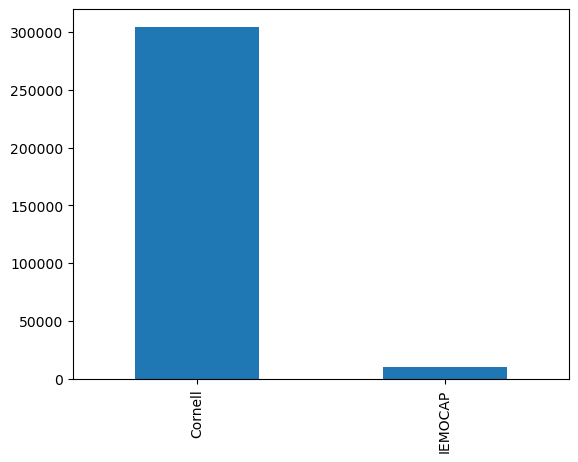

In [31]:
df['source'].value_counts().plot.bar()

In [41]:
val = 2
df1 = df[df["source"] == "IEMOCAP"]
a = ((1/(1+np.exp(-df1.iloc[:, 3:31][df1['27'] < val])))).sum()
b = ((1/(1+np.exp(-df1.iloc[:, 3:31][df1['27'] > val])))).sum()

In [42]:
ab = pd.DataFrame({"a": a, "b": b})

<Axes: >

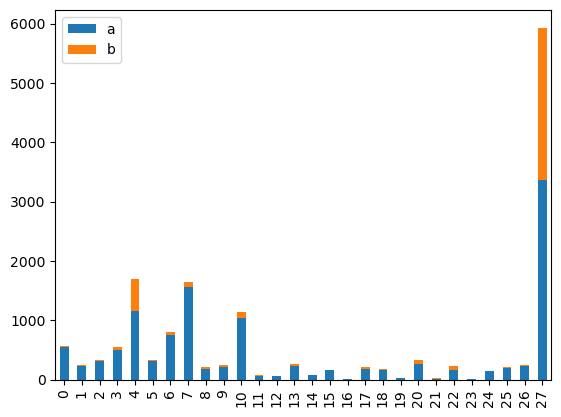

In [43]:
ab.plot.bar(stacked=True)

In [44]:
convs = df.groupby('conversation')

In [45]:
lens = convs['text'].count()

In [46]:
lens.sort_values()

conversation
L535132      1
L127954      1
L129494      1
L129530      1
L133728      1
          ... 
66         108
119        112
92         115
122        136
96         172
Name: text, Length: 83230, dtype: int64

<Axes: >

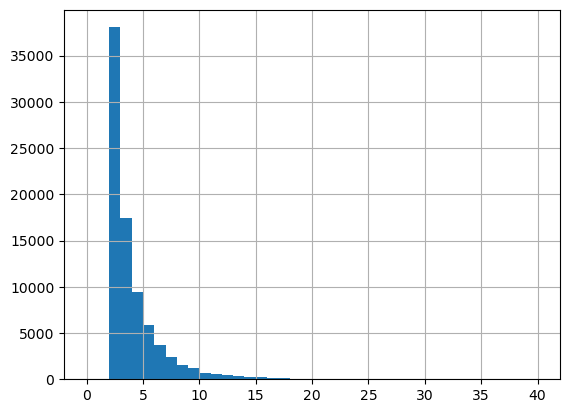

In [47]:
lens.hist(range=[0, 40], bins=40)